In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from math import log

In [2]:
def ploter(title, x_label, y_label_1, y_label_2, axis_x, axis_y_1, axis_y_2):
    fig, ax1 = plt.subplots()
    plt.title(title)
    plt.xlabel(x_label)
    ax2 = ax1.twinx()
    ax1.set_ylabel(y_label_1, color = "black")
    ax1.plot(axis_x, axis_y_1, color="black", alpha=1)
    ax1.tick_params(axis="y", labelcolor="black")
    ax2.set_ylabel(y_label_2, color="teal")
    ax2.plot(axis_x, axis_y_2, color='teal', alpha=0.75)
    ax2.tick_params(axis='y', labelcolor='teal')

In [3]:
raw_data_TXF = pd.read_csv("TXF 1minK 2000-2020.txt", sep = ",", encoding = "utf-8", engine = "c")
raw_data_TXF_AO = pd.read_csv("TXF_AO委賣筆-分鐘-成交價.txt", sep = ",", encoding = "utf-8", engine = "c")
raw_data_TXF_AV= pd.read_csv("TXF_AV委賣量-分鐘-成交價.txt", sep = ",", encoding = "utf-8", engine = "c")
raw_data_TXF_BO = pd.read_csv("TXF_BO委買筆-分鐘-成交價.txt", sep = ",", encoding = "utf-8", engine = "c")
raw_data_TXF_BV = pd.read_csv("TXF_BV委買量-分鐘-成交價.txt", sep = ",", encoding = "utf-8", engine = "c")

In [4]:
time_list = sorted(list(set(raw_data_TXF["<Time>"])))

In [5]:
time_list_d = time_list[time_list.index("08:46:00"):time_list.index("15:01:00")]
time_list_n = sorted(list(set(time_list) - set(time_list_d)))
time_list_n = time_list_n[301::] + time_list_n[0:301]

In [6]:
# 抓2012開始
raw_data_TXF["<Date>"] = pd.to_datetime(raw_data_TXF["<Date>"])
raw_data_TXF["<Time>"] = pd.to_timedelta(raw_data_TXF["<Time>"])
raw_data_TXF_2012 = raw_data_TXF[raw_data_TXF["<Date>"] > "2011/12/31"]
# 拆分日、夜盤
raw_data_TXF_2012_d = raw_data_TXF_2012[(raw_data_TXF_2012["<Time>"] >= "08:45:00") & (raw_data_TXF_2012["<Time>"] <= "13:45:00")].copy()
raw_data_TXF_2012_n = raw_data_TXF_2012[(raw_data_TXF_2012["<Time>"] >= "15:00:00") | (raw_data_TXF_2012["<Time>"] <= "05:00:00")].copy()
# 可進一步把日盤的部分拆成該時期有無實施夜盤
raw_data_TXF_2012_d_with_no_n = raw_data_TXF_2012_d[raw_data_TXF_2012_d["<Date>"] < "2017-05-17"]
raw_data_TXF_2012_d_with_n = raw_data_TXF_2012_d[raw_data_TXF_2012_d["<Date>"] >= "2017-05-17"]

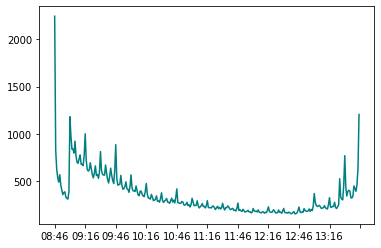

In [7]:
# 有日盤無夜盤時的日盤平均量能概況
meanVol_1 = raw_data_TXF_2012_d_with_no_n.groupby("<Time>").mean()["<Volume>"]
x = [i[0:5] for i in time_list_d]
ticker_spacing = x
ticker_spacing = 30
fig, ax = plt.subplots(1,1)
ax.plot(x, meanVol_1, c = "teal")
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))

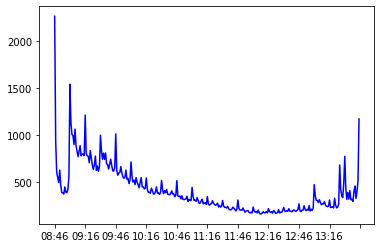

In [8]:
# 有日盤且有夜盤時的日盤平均量能概況
meanVol_2 = raw_data_TXF_2012_d_with_n.groupby("<Time>").mean()["<Volume>"]
x = [i[0:5] for i in time_list_d]
ticker_spacing = x
ticker_spacing = 30
fig, ax = plt.subplots(1,1)
ax.plot(x, meanVol_2, c = "blue")
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))

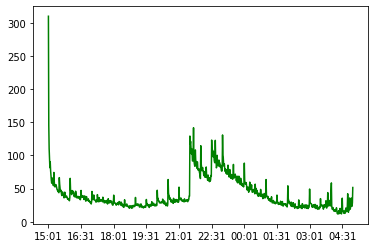

In [9]:
# 有日盤且有夜盤時的夜盤平均量能概況
grouper = raw_data_TXF_2012_n.groupby("<Time>").mean().reset_index()
grouper["Sort_label"] = np.where(grouper["<Time>"] <= "05:00:00", 1, 0)
grouper = grouper.sort_values(by = ["Sort_label", "<Time>"]).reset_index(drop = True)
x = [i[0:5] for i in time_list_n]
ticker_spacing = x
ticker_spacing = 90
fig, ax = plt.subplots(1,1)
ax.plot(x, grouper["<Volume>"], c = "green")
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))

#### 分析委賣筆AO & 委買筆BO

In [10]:
raw_data_TXF_AO["Date"] = pd.to_datetime(raw_data_TXF_AO["Date"])
raw_data_TXF_AO["Time"] = pd.to_timedelta(raw_data_TXF_AO["Time"])
raw_data_TXF_BO["Date"] = pd.to_datetime(raw_data_TXF_BO["Date"])
raw_data_TXF_BO["Time"] = pd.to_timedelta(raw_data_TXF_BO["Time"])
# 切分日盤與夜盤
raw_data_TXF_AO_d = raw_data_TXF_AO[(raw_data_TXF_AO["Time"] >= "08:45:00") & (raw_data_TXF_AO["Time"] <= "13:45:00")].copy()
raw_data_TXF_AO_n = raw_data_TXF_AO[(raw_data_TXF_AO["Time"] >= "15:00:00") | (raw_data_TXF_AO["Time"] <= "05:00:00")].copy()
raw_data_TXF_BO_d = raw_data_TXF_BO[(raw_data_TXF_BO["Time"] >= "08:45:00") & (raw_data_TXF_BO["Time"] <= "13:45:00")].copy()
raw_data_TXF_BO_n = raw_data_TXF_BO[(raw_data_TXF_BO["Time"] >= "15:00:00") | (raw_data_TXF_BO["Time"] <= "05:00:00")].copy()

In [11]:
raw_data_TXF_AO_d

,Date,Time,Open,High,Low,Close,TotalVolume
0,2012-01-02,08:46:00,997.0,997.0,997.0,997.0,1541
1,2012-01-02,08:47:00,1601.0,1601.0,1601.0,1601.0,1874
2,2012-01-02,08:48:00,1894.0,1894.0,1894.0,1894.0,2071
3,2012-01-02,08:49:00,2085.0,2085.0,2085.0,2085.0,2282
4,2012-01-02,08:50:00,2306.0,2306.0,2306.0,2306.0,2439
...,...,...,...,...,...,...,...
1061034,2020-08-31,13:41:00,72878.0,72994.0,72878.0,72994.0,0
1061035,2020-08-31,13:42:00,73019.0,73187.0,73019.0,73187.0,0
1061036,2020-08-31,13:43:00,73206.0,73390.0,73206.0,73390.0,0
1061037,2020-08-31,13:44:00,73411.0,73523.0,73411.0,73511.0,0


In [12]:
raw_data_TXF_BO_d

,Date,Time,Open,High,Low,Close,TotalVolume
0,2012-01-02,08:46:00,756.0,756.0,756.0,756.0,1217
1,2012-01-02,08:47:00,1270.0,1270.0,1270.0,1270.0,1499
2,2012-01-02,08:48:00,1535.0,1535.0,1535.0,1535.0,1864
3,2012-01-02,08:49:00,1896.0,1896.0,1896.0,1896.0,2165
4,2012-01-02,08:50:00,2179.0,2179.0,2179.0,2179.0,2312
...,...,...,...,...,...,...,...
1066716,2020-09-25,13:41:00,68068.0,68116.0,68068.0,68115.0,0
1066717,2020-09-25,13:42:00,68119.0,68176.0,68119.0,68176.0,0
1066718,2020-09-25,13:43:00,68190.0,68248.0,68190.0,68248.0,0
1066719,2020-09-25,13:44:00,68248.0,68350.0,68248.0,68336.0,0


In [13]:
raw_data_TXF_2012_d.columns = ["Date", "Time", "Open", "High", "Low", "Close", "Volume"]
raw_data_TXF_2012_d = pd.merge(raw_data_TXF_2012_d, raw_data_TXF_AO_d[["Date", "Time", "Close"]], how = "left", on = ["Date", "Time"], suffixes=("", "_AO"))

In [14]:
raw_data_TXF_2012_d[raw_data_TXF_2012_d["Close_AO"].isna()].groupby("Date").count() # 總計掉了1116根

,Time,Open,High,Low,Close,Volume,Close_AO
Date,,,,,,,
2012-01-03,300,300,300,300,300,300,0
2012-01-04,300,300,300,300,300,300,0
2012-02-10,77,77,77,77,77,77,0
2013-02-25,1,1,1,1,1,1,0
2013-02-26,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...
2017-09-28,1,1,1,1,1,1,0
2017-09-29,1,1,1,1,1,1,0
2017-10-06,1,1,1,1,1,1,0


In [15]:
raw_data_TXF_2012_d = pd.merge(raw_data_TXF_2012_d, raw_data_TXF_BO_d[["Date", "Time", "Close"]], how = "left", on = ["Date", "Time"], suffixes=("", "_BO"))
raw_data_TXF_2012_d[raw_data_TXF_2012_d["Close_BO"].isna()].groupby("Date").count()

,Time,Open,High,Low,Close,Volume,Close_AO,Close_BO
Date,,,,,,,,
2012-01-03,300,300,300,300,300,300,0,0
2012-01-04,300,300,300,300,300,300,0,0
2012-02-10,77,77,77,77,77,77,0,0
2012-12-12,1,1,1,1,1,1,1,0
2012-12-14,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...
2017-09-28,1,1,1,1,1,1,0,0
2017-09-29,1,1,1,1,1,1,0,0
2017-10-06,1,1,1,1,1,1,0,0


In [16]:
# 暫時先把有漏資料的那幾天剔除不看
a = raw_data_TXF_2012_d[raw_data_TXF_2012_d["Close_AO"].isna()].groupby("Date").count().index
b = raw_data_TXF_2012_d[raw_data_TXF_2012_d["Close_BO"].isna()].groupby("Date").count().index
raw_data_TXF_2012_d = raw_data_TXF_2012_d[(raw_data_TXF_2012_d["Date"].isin(a) == False) & (raw_data_TXF_2012_d["Date"].isin(b) == False)].copy()

In [17]:
# 計算每根K棒委賣委買增值 -> 一階差分
raw_data_TXF_2012_d["AO_increment"] = raw_data_TXF_2012_d["Close_AO"] - raw_data_TXF_2012_d["Close_AO"].shift()
raw_data_TXF_2012_d["BO_increment"] = raw_data_TXF_2012_d["Close_BO"] - raw_data_TXF_2012_d["Close_BO"].shift()
# 將時間為08:46:00處的增量改為Close_AO / Close_BO
raw_data_TXF_2012_d.loc[raw_data_TXF_2012_d["Time"] == "08:46:00", "AO_increment"] = raw_data_TXF_2012_d["Close_AO"]
raw_data_TXF_2012_d.loc[raw_data_TXF_2012_d["Time"] == "08:46:00", "BO_increment"] = raw_data_TXF_2012_d["Close_BO"]

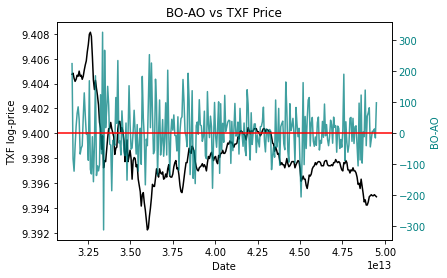

In [18]:
# 計算委買筆 - 委賣筆
raw_data_TXF_2012_d["BO-AO"] = raw_data_TXF_2012_d["BO_increment"] - raw_data_TXF_2012_d["AO_increment"]
# 看價格走勢
condition = raw_data_TXF_2012_d["Date"] == "2020/07/07"
log_price = list(map(lambda x: log(x), raw_data_TXF_2012_d[condition]["Close"]))
ploter("BO-AO vs TXF Price", "Date", "TXF log-price", "BO-AO", raw_data_TXF_2012_d[condition]["Time"], log_price, raw_data_TXF_2012_d[condition]["BO-AO"])
plt.axhline(0, c = "r")

#### 分析委賣量AV & 委買量BV

In [19]:
raw_data_TXF_AV["Date"] = pd.to_datetime(raw_data_TXF_AV["Date"])
raw_data_TXF_AV["Time"] = pd.to_timedelta(raw_data_TXF_AV["Time"])
raw_data_TXF_BV["Date"] = pd.to_datetime(raw_data_TXF_BV["Date"])
raw_data_TXF_BV["Time"] = pd.to_timedelta(raw_data_TXF_BV["Time"])
# 切分日盤與夜盤
raw_data_TXF_AV_d = raw_data_TXF_AV[(raw_data_TXF_AV["Time"] >= "08:45:00") & (raw_data_TXF_AV["Time"] <= "13:45:00")].copy()
raw_data_TXF_AV_n = raw_data_TXF_AV[(raw_data_TXF_AV["Time"] >= "15:00:00") | (raw_data_TXF_AV["Time"] <= "05:00:00")].copy()
raw_data_TXF_BV_d = raw_data_TXF_BV[(raw_data_TXF_BV["Time"] >= "08:45:00") & (raw_data_TXF_BV["Time"] <= "13:45:00")].copy()
raw_data_TXF_BV_n = raw_data_TXF_BV[(raw_data_TXF_BV["Time"] >= "15:00:00") | (raw_data_TXF_BV["Time"] <= "05:00:00")].copy()

In [20]:
raw_data_TXF_AV_d

,Date,Time,Open,High,Low,Close,TotalVolume
0,2012-01-02,08:46:00,4105.0,4105.0,4105.0,4105.0,4756
1,2012-01-02,08:47:00,4865.0,4865.0,4865.0,4865.0,5728
2,2012-01-02,08:48:00,5794.0,5794.0,5794.0,5794.0,6356
3,2012-01-02,08:49:00,6403.0,6403.0,6403.0,6403.0,6514
4,2012-01-02,08:50:00,6406.0,6406.0,6406.0,6406.0,6737
...,...,...,...,...,...,...,...
1067803,2020-09-25,13:41:00,132144.0,132274.0,132144.0,132274.0,0
1067804,2020-09-25,13:42:00,132287.0,132368.0,132287.0,132368.0,0
1067805,2020-09-25,13:43:00,132462.0,132488.0,132352.0,132383.0,0
1067806,2020-09-25,13:44:00,132397.0,132920.0,132397.0,132920.0,0


In [21]:
raw_data_TXF_BV_d

,Date,Time,Open,High,Low,Close,TotalVolume
0,2012-01-02,08:46:00,2896.0,2896.0,2896.0,2896.0,3682
1,2012-01-02,08:47:00,3824.0,3824.0,3824.0,3824.0,4308
2,2012-01-02,08:48:00,4402.0,4402.0,4402.0,4402.0,5036
3,2012-01-02,08:49:00,5111.0,5111.0,5111.0,5111.0,5705
4,2012-01-02,08:50:00,5733.0,5733.0,5733.0,5733.0,5992
...,...,...,...,...,...,...,...
1067801,2020-09-25,13:41:00,131674.0,131798.0,131674.0,131769.0,0
1067802,2020-09-25,13:42:00,131799.0,131930.0,131799.0,131930.0,0
1067803,2020-09-25,13:43:00,132014.0,132100.0,131927.0,131975.0,0
1067804,2020-09-25,13:44:00,131979.0,132352.0,131979.0,132352.0,0


In [22]:
# 把AV, BV資料merge上去，順便檢查還有沒有新增漏資料的日期(important, 因為前面AO BO已經刪了幾筆, 這邊若又有新增要刪的, 前面也應該刪才能比較)
raw_data_TXF_2012_d = pd.merge(raw_data_TXF_2012_d, raw_data_TXF_AV_d[["Date", "Time", "Close"]], how = "left", on = ["Date", "Time"], suffixes=("", "_AV"))
raw_data_TXF_2012_d = pd.merge(raw_data_TXF_2012_d, raw_data_TXF_BV_d[["Date", "Time", "Close"]], how = "left", on = ["Date", "Time"], suffixes=("", "_BV"))

In [26]:
# check過都無na，代表上面就已經把會漏資料的日期都刪了。
# raw_data_TXF_2012_d[raw_data_TXF_2012_d["Close_AV"].isna()]
# raw_data_TXF_2012_d[raw_data_TXF_2012_d["Close_BV"].isna()]

In [27]:
# 計算委買量與委賣量當根分K增值 -> 一階差分
raw_data_TXF_2012_d["AV_increment"] = raw_data_TXF_2012_d["Close_AV"] - raw_data_TXF_2012_d["Close_AV"].shift()
raw_data_TXF_2012_d["BV_increment"] = raw_data_TXF_2012_d["Close_BV"] - raw_data_TXF_2012_d["Close_BV"].shift()
# 將08:46:00那根的增值改成close
raw_data_TXF_2012_d.loc[raw_data_TXF_2012_d["Time"] == "08:46:00", "AV_increment"] = raw_data_TXF_2012_d["Close_AV"]
raw_data_TXF_2012_d.loc[raw_data_TXF_2012_d["Time"] == "08:46:00", "BV_increment"] = raw_data_TXF_2012_d["Close_BV"]

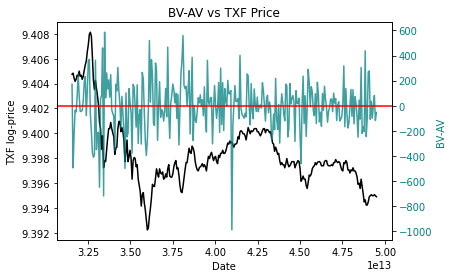

In [28]:
# 計算委買量 - 委賣量
raw_data_TXF_2012_d["BV-AV"] = raw_data_TXF_2012_d["BV_increment"] - raw_data_TXF_2012_d["AV_increment"]
# 看價格走勢
condition = raw_data_TXF_2012_d["Date"] == "2020/07/07"
log_price = list(map(lambda x: log(x), raw_data_TXF_2012_d[condition]["Close"]))
ploter("BV-AV vs TXF Price", "Date", "TXF log-price", "BV-AV", raw_data_TXF_2012_d[condition]["Time"], log_price, raw_data_TXF_2012_d[condition]["BV-AV"])
plt.axhline(0, c = "r")

#### 以下為策略邏輯與訊號出現後後續市場反應分析

In [37]:
raw_data_TXF_2012_d["next 1minK movement"] = raw_data_TXF_2012_d["Close"].shift(-1) - raw_data_TXF_2012_d["Close"]
raw_data_TXF_2012_d.loc[raw_data_TXF_2012_d["Time"] == "13:45:00", "next 1minK movement"] = np.nan

In [52]:
# 策略邏輯1：當委買筆數小於委賣筆數，但委買量卻比委賣量多的時候，代表大戶站買方，散戶站賣方，此時應跟著大戶做多。
buy_signal = raw_data_TXF_2012_d[(raw_data_TXF_2012_d["BO-AO"] < 0) & (raw_data_TXF_2012_d["BV-AV"] > 0)]

In [39]:
# 策略邏輯2：當委買筆數大於委賣筆數，但委買量卻比委賣量少的時候，代表大戶站賣方，散戶站買方，此時應跟著大戶做空。
sell_signal = raw_data_TXF_2012_d[(raw_data_TXF_2012_d["BO-AO"] > 0) & (raw_data_TXF_2012_d["BV-AV"] < 0)]

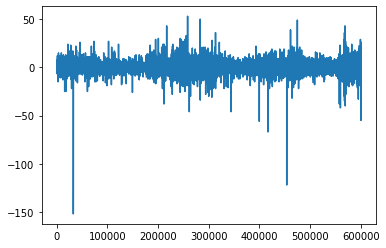

In [57]:
plt.plot(buy_signal["next 1minK movement"])

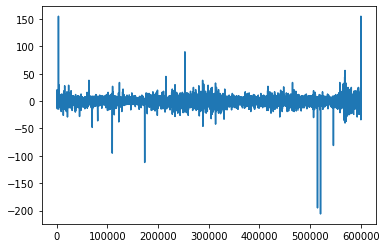

In [58]:
plt.plot(sell_signal["next 1minK movement"])

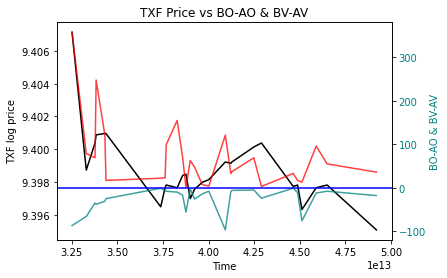

In [62]:
# 看價格走勢 -> 2020/07/07多頭訊號
condition = (raw_data_TXF_2012_d["Date"] == "2020/07/07") & (raw_data_TXF_2012_d["BO-AO"] < 0) & (raw_data_TXF_2012_d["BV-AV"] > 0)
log_price = list(map(lambda x: log(x), raw_data_TXF_2012_d[condition]["Close"]))
fig, ax1 = plt.subplots()
plt.title("TXF Price vs BO-AO & BV-AV")
plt.xlabel("Time")
ax2 = ax1.twinx()
ax1.set_ylabel("TXF log price", color = "black")
ax1.plot(raw_data_TXF_2012_d[condition]["Time"], log_price, color="black", alpha=1)
ax1.tick_params(axis="y", labelcolor="black")
ax2.set_ylabel("BO-AO & BV-AV", color="teal")
ax2.plot(raw_data_TXF_2012_d[condition]["Time"], raw_data_TXF_2012_d[condition]["BO-AO"], color='teal', alpha=0.75)
ax2.plot(raw_data_TXF_2012_d[condition]["Time"], raw_data_TXF_2012_d[condition]["BV-AV"], color='red', alpha=0.75)
ax2.tick_params(axis='y', labelcolor='teal')
plt.axhline(0, c = "b")

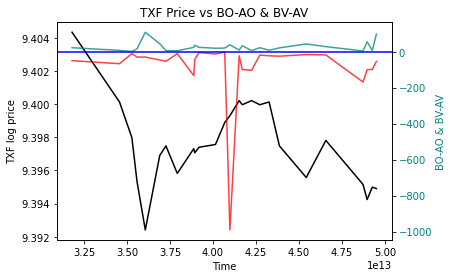

In [63]:
# 看價格走勢 -> 2020/07/07空頭訊號
condition = (raw_data_TXF_2012_d["Date"] == "2020/07/07") & (raw_data_TXF_2012_d["BO-AO"] > 0) & (raw_data_TXF_2012_d["BV-AV"] < 0)
log_price = list(map(lambda x: log(x), raw_data_TXF_2012_d[condition]["Close"]))
fig, ax1 = plt.subplots()
plt.title("TXF Price vs BO-AO & BV-AV")
plt.xlabel("Time")
ax2 = ax1.twinx()
ax1.set_ylabel("TXF log price", color = "black")
ax1.plot(raw_data_TXF_2012_d[condition]["Time"], log_price, color="black", alpha=1)
ax1.tick_params(axis="y", labelcolor="black")
ax2.set_ylabel("BO-AO & BV-AV", color="teal")
ax2.plot(raw_data_TXF_2012_d[condition]["Time"], raw_data_TXF_2012_d[condition]["BO-AO"], color='teal', alpha=0.75)
ax2.plot(raw_data_TXF_2012_d[condition]["Time"], raw_data_TXF_2012_d[condition]["BV-AV"], color='red', alpha=0.75)
ax2.tick_params(axis='y', labelcolor='teal')
plt.axhline(0, c = "b")

In [ ]:
"""問題
1. 漏資料下，MC怎麼寫
2. MC委買 委賣 內盤 外盤 資料只有一年
3. 目前只有2012開始的委買委賣
"""